In [20]:
# 1) Design model (input,output,forward pass)
# 2) Construct loss and optimizer 
# 3) Trainning Loop
# -foward pass: compute prediction
# -backward pass:gradients
# -update weights

In [21]:
import torch
import torch.nn as nn # neural network module
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# 0) Data Preparation
X_numpy , y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0],1) # view is .reshape
n_samples , n_features = X.shape

n_samples,n_features

(100, 1)

In [23]:
# 1) Design Model

input_size = n_features # X
output_size = 1 # y
model = nn.Linear(input_size,output_size)

In [26]:
# 2) Loss and Optimizer
learning_rate = 0.01

loss_function = nn.MSELoss()  

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch: 10, Loss = 290.1607
Epoch: 20, Loss = 290.1604
Epoch: 30, Loss = 290.1602
Epoch: 40, Loss = 290.1600
Epoch: 50, Loss = 290.1599
Epoch: 60, Loss = 290.1599
Epoch: 70, Loss = 290.1598
Epoch: 80, Loss = 290.1598
Epoch: 90, Loss = 290.1598
Epoch: 100, Loss = 290.1598


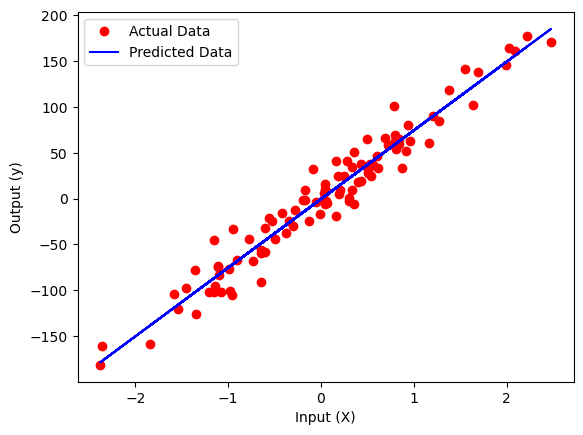

In [31]:
# 3) Training
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights

epochs = 100

for epoch in range(epochs):
    # forward-pass and loss
    y_predicted = model(X)
    current_loss = loss_function(y_predicted, y)  
    
    # backward pass
    current_loss.backward()  # Calculates the gradient
    
    # update weights
    optimizer.step()
    
    # Empty the gradients
    optimizer.zero_grad() 
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss = {current_loss.item():.4f}')
        
# Plot      
plt.plot(X_numpy, y_numpy, 'ro', label='Actual Data')  # Plot actual data points
plt.plot(X_numpy, predicted, 'b', label='Predicted Data')  # Plot predicted data points
plt.xlabel('Input (X)')  # Label for the x-axis
plt.ylabel('Output (y)')  # Label for the y-axis
plt.legend()  # Show legend
plt.show()